In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [201]:
df_train = pd.read_csv("./data/train.csv")


In [202]:
df_train.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


In [203]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [204]:
df_train['Ram'] = df_train['Ram'].str.replace('GB', '').astype(int)


In [205]:
df_train['Weight'] = df_train['Weight'].str.replace('kg', '').astype(float)


In [206]:
df_train.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,1713.37


In [207]:
df_train['Touchscreen'] = df_train['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df_train['IPS'] = df_train['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)



In [208]:
df_train.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,749.00,0,0
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,449.00,0,0
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,1460.00,0,0
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2868.99,0,1
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,1713.37,1,0


In [209]:
def extract_resolution(res):
    res = res.split()[-1] 
    try:
        x_res, y_res = res.split('x')
        return int(x_res), int(y_res)
    except:
        return None, None

In [210]:
df_train['X_res'], df_train['Y_res'] = zip(*df_train['ScreenResolution'].map(extract_resolution))


In [211]:
df_train.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,749.00,0,0,1366,768
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,449.00,0,0,1366,768
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,1460.00,0,0,1920,1080
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2868.99,0,1,3840,2160
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,1713.37,1,0,1920,1080


In [212]:
def categorize_cpu(text):
    text = text.lower()
    if 'intel core i7' in text:
        return 'Intel i7'
    elif 'intel core i5' in text:
        return 'Intel i5'
    elif 'intel core i3' in text:
        return 'Intel i3'
    elif 'intel celeron' in text:
        return 'Intel Celeron'
    elif 'intel pentium' in text:
        return 'Intel Pentium'
    elif 'amd ryzen' in text:
        return 'AMD Ryzen'
    elif 'amd a' in text:
        return 'AMD A Series'
    elif 'amd athlon' in text:
        return 'AMD Athlon'
    else:
        return 'Other'

In [213]:
def categorize_gpu(text):
    text = text.lower()
    if 'nvidia' in text:
        return 'Nvidia'
    elif 'amd' in text:
        return 'AMD'
    elif 'intel' in text:
        return 'Intel'
    else:
        return 'Other'

In [214]:
df_train['Cpu'] = df_train['Cpu'].apply(categorize_cpu)
df_train['Gpu'] = df_train['Gpu'].apply(categorize_gpu)

In [215]:
df_train.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel i7,8,1TB HDD,AMD,Windows 10,2.36,749.00,0,0,1366,768
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium,4,1TB HDD,Intel,Windows 10,2.00,449.00,0,0,1366,768
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel i5,8,256GB SSD,Intel,Windows 7,1.20,1460.00,0,0,1920,1080
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel i7,16,256GB SSD + 1TB HDD,Nvidia,Windows 10,4.42,2868.99,0,1,3840,2160
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel i5,8,256GB SSD,Intel,Windows 7,1.26,1713.37,1,0,1920,1080


In [216]:
print(df_train['Cpu'].value_counts())
print(df_train['Gpu'].value_counts())

Cpu
Intel i7         351
Intel i5         305
Intel i3          99
Intel Celeron     62
Other             38
AMD A Series      28
Intel Pentium     26
AMD Ryzen          3
Name: count, dtype: int64
Gpu
Intel     522
Nvidia    268
AMD       122
Name: count, dtype: int64


In [217]:
df_train['OpSys'].unique()

array(['Windows 10', 'Windows 7', 'Linux', 'Chrome OS', 'No OS',
       'Mac OS X', 'Windows 10 S', 'macOS', 'Android'], dtype=object)

In [218]:
def simplify_os(text):
    text = text.lower()
    if 'windows' in text:
        return 'Windows'
    elif 'mac' in text:
        return 'MacOS'
    elif 'linux' in text:
        return 'Linux'
    else:
        return 'Other'
        
df_train['OpSys'] = df_train['OpSys'].apply(simplify_os)

In [219]:
df_train.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel i7,8,1TB HDD,AMD,Windows,2.36,749.00,0,0,1366,768
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium,4,1TB HDD,Intel,Windows,2.00,449.00,0,0,1366,768
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel i5,8,256GB SSD,Intel,Windows,1.20,1460.00,0,0,1920,1080
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel i7,16,256GB SSD + 1TB HDD,Nvidia,Windows,4.42,2868.99,0,1,3840,2160
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel i5,8,256GB SSD,Intel,Windows,1.26,1713.37,1,0,1920,1080


In [220]:
df_train['Memory'].value_counts()

Memory
256GB SSD                        293
1TB HDD                          150
500GB HDD                        100
512GB SSD                         75
128GB SSD +  1TB HDD              61
128GB SSD                         56
256GB SSD +  1TB HDD              52
32GB Flash Storage                27
2TB HDD                           11
64GB Flash Storage                11
512GB SSD +  1TB HDD              10
1TB SSD                            9
256GB Flash Storage                7
1.0TB Hybrid                       7
32GB SSD                           5
180GB SSD                          5
256GB SSD +  2TB HDD               4
16GB Flash Storage                 4
16GB SSD                           3
512GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
128GB Flash Storage                2
256GB SSD +  1.0TB Hybrid          1
64GB SSD                           1
240GB SSD                      

In [221]:
df_train['SSD'] = df_train['Memory'].apply(lambda x: 1 if 'SSD' in x else 0)


In [222]:
df_train['HDD'] = df_train['Memory'].apply(lambda x: 1 if 'HDD' in x else 0)
df_train['Flash_Storage'] = df_train['Memory'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
df_train['HDD'] = df_train['Memory'].apply(lambda x: 1 if ('HDD' in x or 'Hybrid' in x) else 0)


In [223]:
df_train.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res,SSD,HDD,Flash_Storage
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel i7,8,1TB HDD,...,Windows,2.36,749.00,0,0,1366,768,0,1,0
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium,4,1TB HDD,...,Windows,2.00,449.00,0,0,1366,768,0,1,0
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel i5,8,256GB SSD,...,Windows,1.20,1460.00,0,0,1920,1080,1,0,0
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel i7,16,256GB SSD + 1TB HDD,...,Windows,4.42,2868.99,0,1,3840,2160,1,1,0
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel i5,8,256GB SSD,...,Windows,1.26,1713.37,1,0,1920,1080,1,0,0


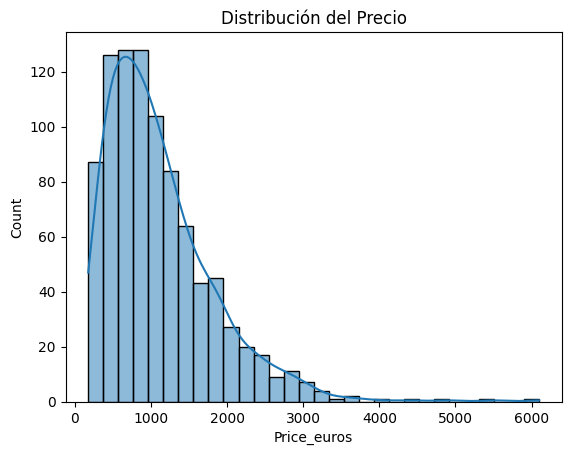

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_train['Price_euros'], bins=30, kde=True)
plt.title('Distribución del Precio')
plt.show()

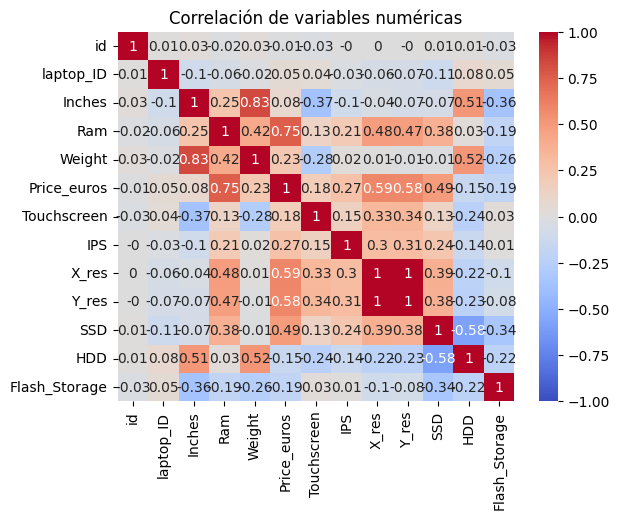

In [225]:
corr = df_train.corr(numeric_only=True).round(2)  # Máximo 2 decimales
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax = 1, vmin = -1)
plt.title('Correlación de variables numéricas')
plt.show()

In [226]:
df_train.drop(columns=[ 'laptop_ID'], inplace=True)


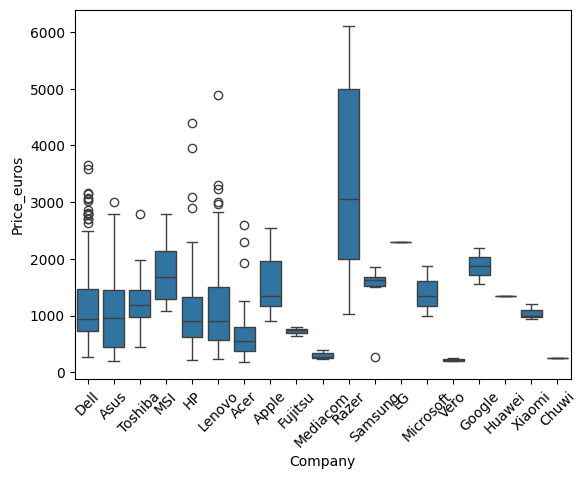

In [227]:
sns.boxplot(x='Company', y='Price_euros', data=df_train)
plt.xticks(rotation=45)
plt.show()

In [228]:
X = df_train.drop(columns=['Price_euros'])
y = df_train['Price_euros']           

In [229]:
X = pd.get_dummies(X, drop_first=True)


In [264]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [231]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [265]:
rf_preds = model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
print(f'MAE Random Forest: {rf_mae:.2f} €')


MAE Random Forest: 196.87 €


In [270]:
from sklearn.linear_model import LinearRegression

lr_lineal = LinearRegression()
lr_lineal.fit(X_train, y_train)

lr_preds = lr_lineal.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_preds)
print(f'MAE Regresión Lineal: {lr_mae:.2f} €')

MAE Regresión Lineal: 256.07 €


In [267]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

y_poly_pred = lr_poly.predict(X_poly_test)
mae_poly = mean_absolute_error(y_test, y_poly_pred)
print(f"MAE Regresión Polinómica: {mae_poly:.2f} €")

MAE Regresión Polinómica: 824.67 €


In [269]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

tree_preds = tree_model.predict(X_test)
tree_mae = mean_absolute_error(y_test, tree_preds)
print(f'MAE Árbol de Decisión: {tree_mae:.2f} €')


MAE Árbol de Decisión: 244.03 €


In [271]:
df_test = pd.read_csv('./data/test.csv')


In [272]:
df_test['Ram'] = df_test['Ram'].str.replace('GB', '').astype(int)


In [273]:
df_test['Weight'] = df_test['Weight'].str.replace('kg', '').astype(float)


In [274]:
df_test['Touchscreen'] = df_test['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df_test['IPS'] = df_test['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)


In [275]:
df_test['X_res'], df_test['Y_res'] = zip(*df_test['ScreenResolution'].map(extract_resolution))


In [276]:
df_test['Cpu'] = df_test['Cpu'].apply(categorize_cpu)
df_test['Gpu'] = df_test['Gpu'].apply(categorize_gpu)

In [277]:
df_test['OpSys'] = df_test['OpSys'].apply(simplify_os)

In [278]:
df_test['SSD'] = df_test['Memory'].apply(lambda x: 1 if 'SSD' in x else 0)


In [279]:
df_test['HDD'] = df_test['Memory'].apply(lambda x: 1 if 'HDD' in x else 0)
df_test['Flash_Storage'] = df_test['Memory'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
df_test['HDD'] = df_test['Memory'].apply(lambda x: 1 if ('HDD' in x or 'Hybrid' in x) else 0)


In [280]:
X_test_final = pd.get_dummies(df_test, drop_first=True)

# Reindexar para asegurar que las columnas coinciden con X
X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)

In [281]:
df_train.head()

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res,SSD,HDD,Flash_Storage
0,268,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel i7,8,1TB HDD,AMD,Windows,2.36,749.00,0,0,1366,768,0,1,0
1,347,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium,4,1TB HDD,Intel,Windows,2.00,449.00,0,0,1366,768,0,1,0
2,353,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel i5,8,256GB SSD,Intel,Windows,1.20,1460.00,0,0,1920,1080,1,0,0
3,578,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel i7,16,256GB SSD + 1TB HDD,Nvidia,Windows,4.42,2868.99,0,1,3840,2160,1,1,0
4,42,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel i5,8,256GB SSD,Intel,Windows,1.26,1713.37,1,0,1920,1080,1,0,0


In [284]:
y_pred_lr = lr_lineal.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"MAE Regresión Lineal: {mae_lr:.2f} €")

# Regresión polinómica
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
y_pred_poly = lr_poly.predict(X_poly_test)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print(f"MAE Regresión Polinómica: {mae_poly:.2f} €")

# Árbol de decisión
y_pred_tree = tree_model.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(f"MAE Árbol de Decisión: {mae_tree:.2f} €")

MAE Regresión Lineal: 256.07 €
MAE Regresión Polinómica: 824.67 €
MAE Árbol de Decisión: 244.03 €


In [285]:
print(f"MAE Regresión Lineal     : {mae_lr:.2f} €")
print(f"MAE Regresión Polinómica : {mae_poly:.2f} €")
print(f"MAE Árbol de Decisión     : {mae_tree:.2f} €")


MAE Regresión Lineal     : 256.07 €
MAE Regresión Polinómica : 824.67 €
MAE Árbol de Decisión     : 244.03 €


In [291]:
X_test_final = pd.get_dummies(df_test, drop_first=True)
X_test_final = X_test_final.reindex(columns=X_train.columns, fill_value=0)

y_pred_final = tree_model.predict(X_test_final)

In [294]:
submission = pd.DataFrame({
    'id': df_test['id'],      
    'Price_euros': y_pred_final      
})

submission.to_csv('submission_JC.csv', index=False)

In [293]:
submission.head()

,id,Price_euros
0,181,2620.0
1,708,665.0
2,862,443.9
3,1064,1469.0
4,702,1460.0


In [ ]:
print(df_test.shape[0])  


391


In [ ]:
print(X_test_final.shape[0]) 


391
